<a href="https://colab.research.google.com/github/joovibb/Data-Analysis/blob/main/Data%20analysis.K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
url="https://vincentarelbundock.github.io/Rdatasets/csv/palmerpenguins/penguins.csv"
penguins=pd.read_csv(url)
penguins.head()

,rownames,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins_dropped = penguins.dropna()

In [ ]:
penguins = penguins.fillna(penguins.mean())

<ipython-input-33-8b5e586fa6d5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguins = penguins.fillna(penguins.mean())


In [ ]:
missing_values = penguins.isna()

missing_count = missing_values.sum()


print(missing_count)

rownames              0
species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64


,rownames,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,2,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,3,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,4,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,2007
4,5,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

penguins['sex'] = le.fit_transform(penguins['sex'])

penguins['species'] = le.fit_transform(penguins['species'])

In [ ]:
x = penguins.iloc[:, [1,5,6,7]].values

In [ ]:
pen_outcome = pd.crosstab(index=penguins["species"],
                              columns="count")

pen_outcome

col_0,count
species,
0,152
1,68
2,124


In [ ]:
pen_Adelie=penguins.loc[penguins["species"]=="Adelie"]
pen_Chinstrap=penguins.loc[penguins["species"]=="Chinstrap"]
pen_Gentoo=penguins.loc[penguins["species"]=="Gentoo"]

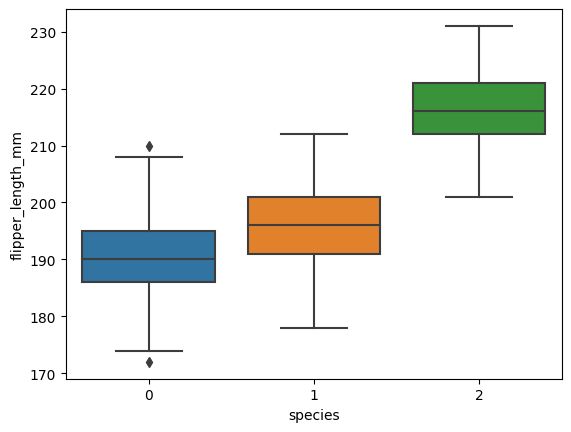

In [ ]:
sns.boxplot(x="species",y="flipper_length_mm",data=penguins)
plt.show()

In [ ]:

penguins['island'] = le.fit_transform(penguins['island'])
penguins.head()

,rownames,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,0,2,39.10000,18.70000,181.000000,3750.000000,1,2007
1,2,0,2,39.50000,17.40000,186.000000,3800.000000,0,2007
2,3,0,2,40.30000,18.00000,195.000000,3250.000000,0,2007
3,4,0,2,43.92193,17.15117,200.915205,4201.754386,2,2007
4,5,0,2,36.70000,19.30000,193.000000,3450.000000,0,2007


In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

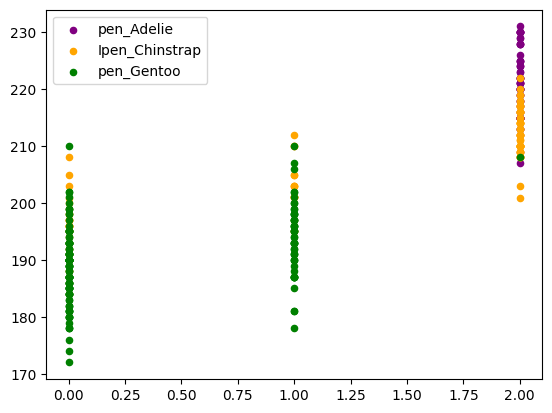

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'purple', label = 'pen_Adelie')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'orange', label = 'Ipen_Chinstrap')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'pen_Gentoo')
plt.legend()

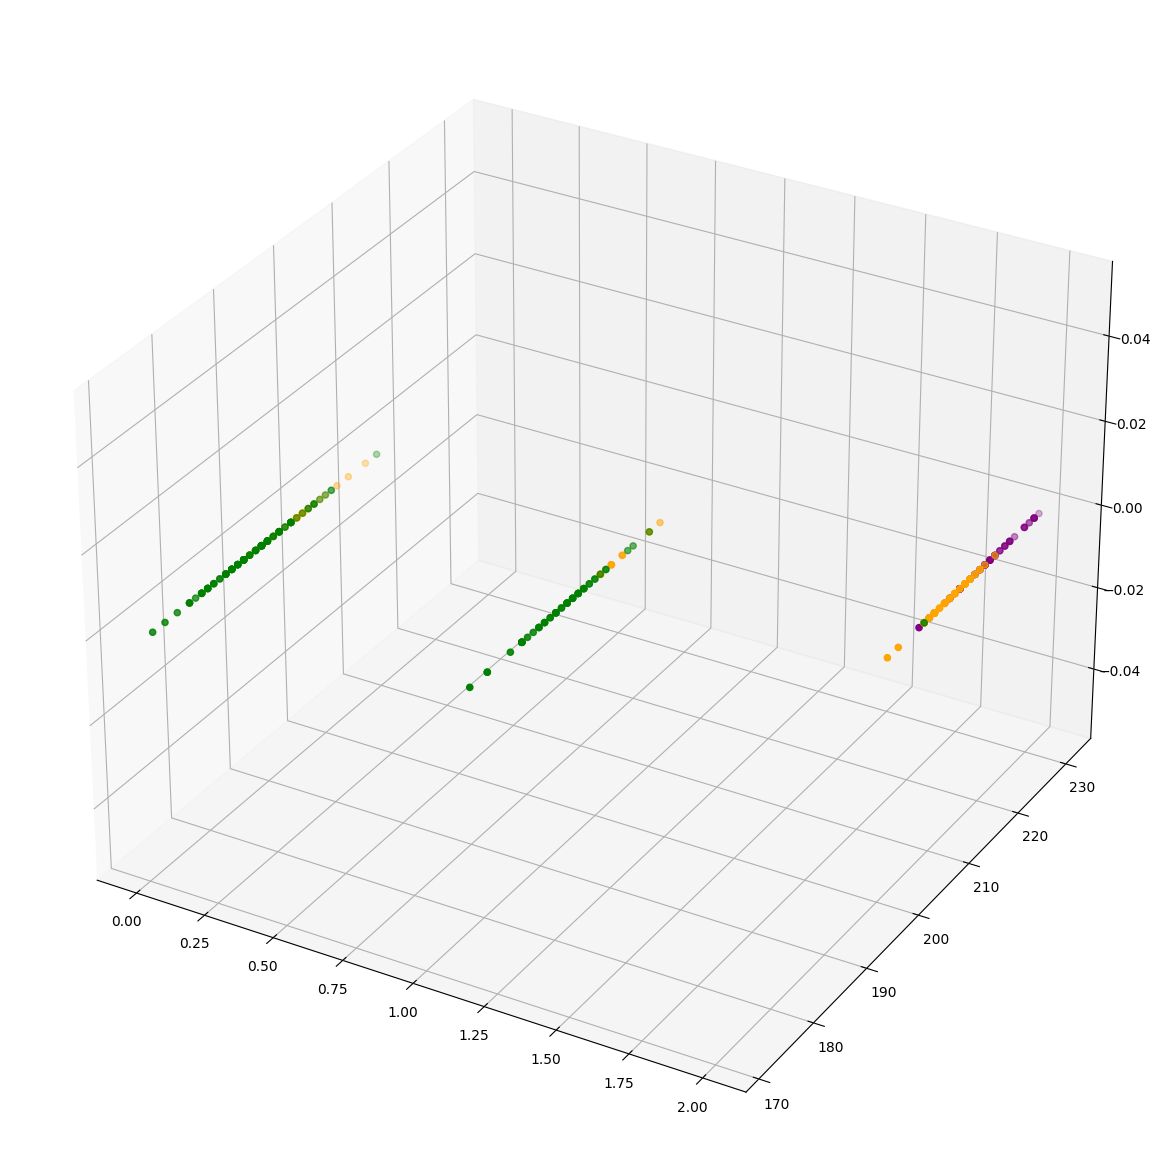

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'purple', label = 'pen_Adelie')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'orange', label = 'Ipen_Chinstrap')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green', label = 'pen_Gentoo')

plt.show()

In [ ]:
pen_df=penguins.drop('species',axis=1)
cat_col=['island','sex']
cat_col_encoded=pd.get_dummies(pen_df[cat_col],
prefix_sep='',drop_first=False,sparse=False)
pen_df=pen_df.drop(pen_df[cat_col],axis=1)
pen_df=pd.concat([pen_df,cat_col_encoded],axis=1)


In [ ]:
pen_df

,rownames,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island,sex
0,1,39.10000,18.70000,181.000000,3750.000000,2007,2,1
1,2,39.50000,17.40000,186.000000,3800.000000,2007,2,0
2,3,40.30000,18.00000,195.000000,3250.000000,2007,2,0
3,4,43.92193,17.15117,200.915205,4201.754386,2007,2,2
4,5,36.70000,19.30000,193.000000,3450.000000,2007,2,0
...,...,...,...,...,...,...,...,...
339,340,55.80000,19.80000,207.000000,4000.000000,2009,1,1
340,341,43.50000,18.10000,202.000000,3400.000000,2009,1,0
341,342,49.60000,18.20000,193.000000,3775.000000,2009,1,1
342,343,50.80000,19.00000,210.000000,4100.000000,2009,1,1


In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(pen_df)
    wcss.append(kmeans.inertia_)
    kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(pen_df)

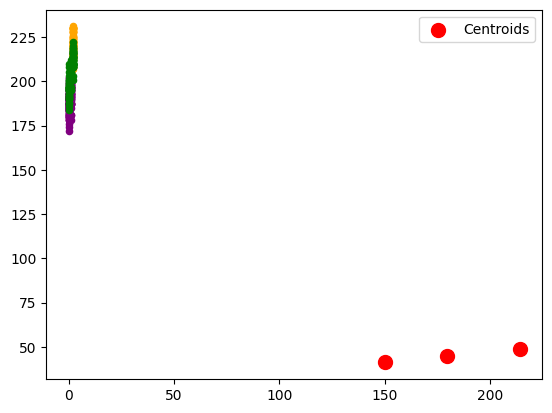

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'purple')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'orange')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

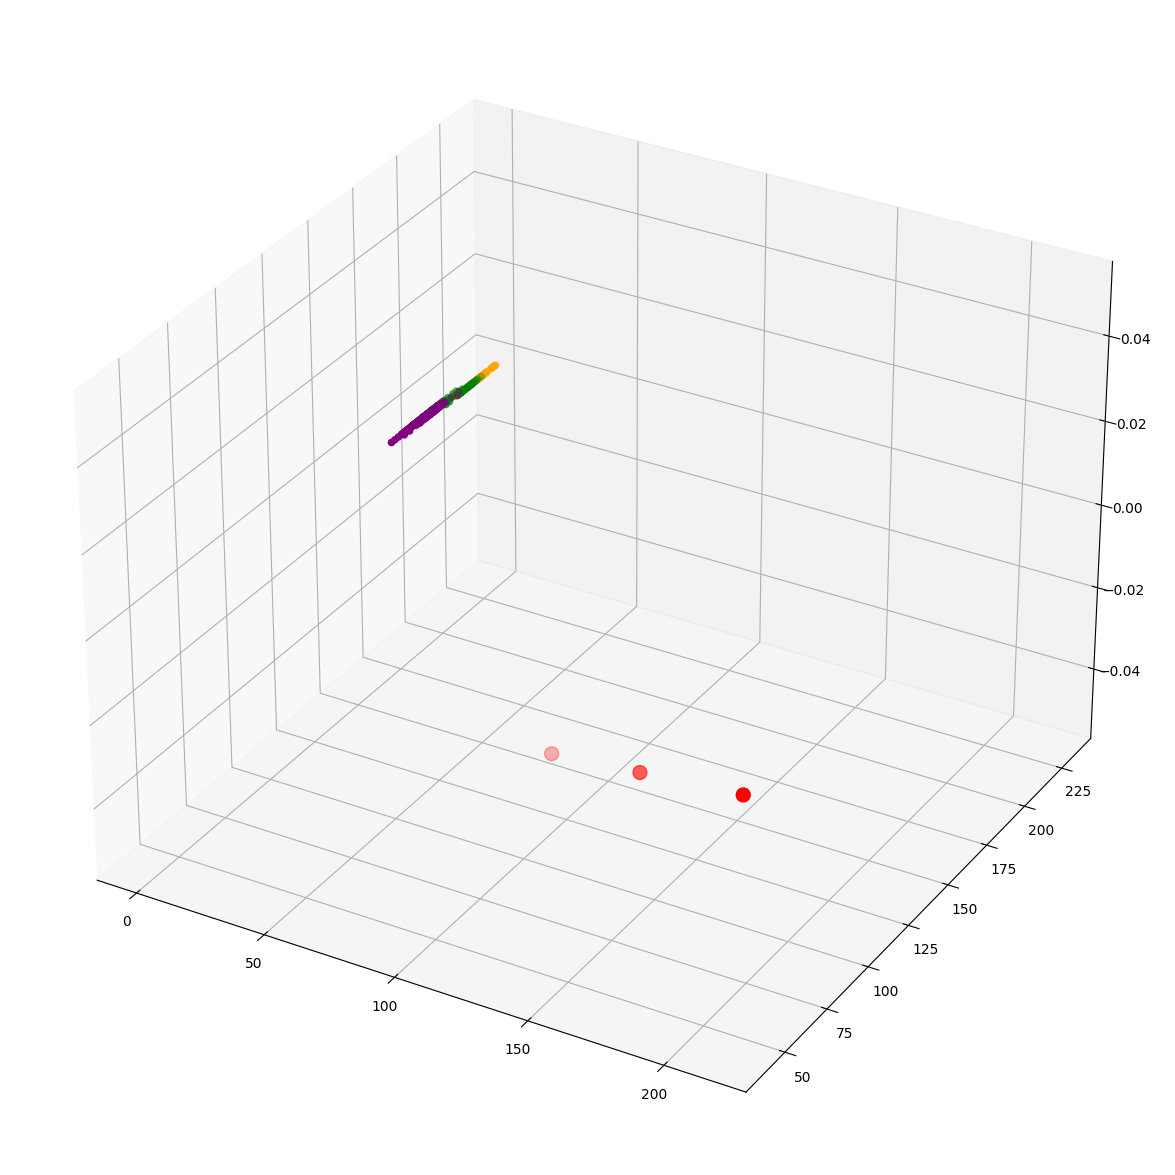

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'purple', )
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'orange', )
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'green',)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.show()